In [6]:
# Data Analysis Notebook for Game Interactions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
data = pd.read_csv("../data/interactions.csv")
data["Reaction Time (ms)"] = pd.to_numeric(data["Reaction Time (ms)"], errors="coerce")
data.dropna(inplace=True)

In [7]:
# 2. Summary
print("Summary Statistics:\n", data.describe(include='all'))

Summary Statistics:
          Timestamp  Tile Speed Expected Key Pressed Key Correct  \
count   100.000000       100.0          100         100     100   
unique         NaN         NaN            9          10       2   
top            NaN         NaN        space      Missed    True   
freq           NaN         NaN           16          14      72   
mean     36.329500         5.0          NaN         NaN     NaN   
std      21.012763         0.0          NaN         NaN     NaN   
min       0.790000         5.0          NaN         NaN     NaN   
25%      18.570000         5.0          NaN         NaN     NaN   
50%      36.035000         5.0          NaN         NaN     NaN   
75%      54.645000         5.0          NaN         NaN     NaN   
max      72.500000         5.0          NaN         NaN     NaN   

        Reaction Time (ms)  
count           100.000000  
unique                 NaN  
top                    NaN  
freq                   NaN  
mean            713.144600  


In [8]:
# 3. Correct vs Incorrect
correct_counts = data["Correct"].value_counts()
print("\nCorrect vs Incorrect:\n", correct_counts)


Correct vs Incorrect:
 Correct
True     72
False    28
Name: count, dtype: int64


In [9]:
# 4. Average Reaction Times
avg_rt = data["Reaction Time (ms)"].mean()
avg_rt_correct = data[data["Correct"] == True]["Reaction Time (ms)"].mean()
print("\nAverage Reaction Time (ms):", avg_rt)
print("Average Reaction Time (Correct Only):", avg_rt_correct)


Average Reaction Time (ms): 713.1446000000001
Average Reaction Time (Correct Only): 403.0422222222222


In [10]:
# 5. Accuracy Over Time
data["Time Bin"] = pd.cut(data["Timestamp"], bins=5)
accuracy_time = data.groupby("Time Bin")["Correct"].mean()
print("\nAccuracy Over Time:\n", accuracy_time)


Accuracy Over Time:
 Time Bin
(0.718, 15.132]     0.761905
(15.132, 29.474]    0.750000
(29.474, 43.816]    0.750000
(43.816, 58.158]    0.631579
(58.158, 72.5]      0.700000
Name: Correct, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_5764\3565636026.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_time = data.groupby("Time Bin")["Correct"].mean()


In [11]:
# 6. Reaction Time by Key
reaction_by_key = data[data["Correct"] == True].groupby("Expected Key")["Reaction Time (ms)"].mean()
print("\nReaction Time by Expected Key:\n", reaction_by_key)


Reaction Time by Expected Key:
 Expected Key
;        369.333750
a        470.668571
d        453.773333
f        294.956667
j        360.850833
k        419.063333
l        408.051667
s        443.944000
space    385.338182
Name: Reaction Time (ms), dtype: float64


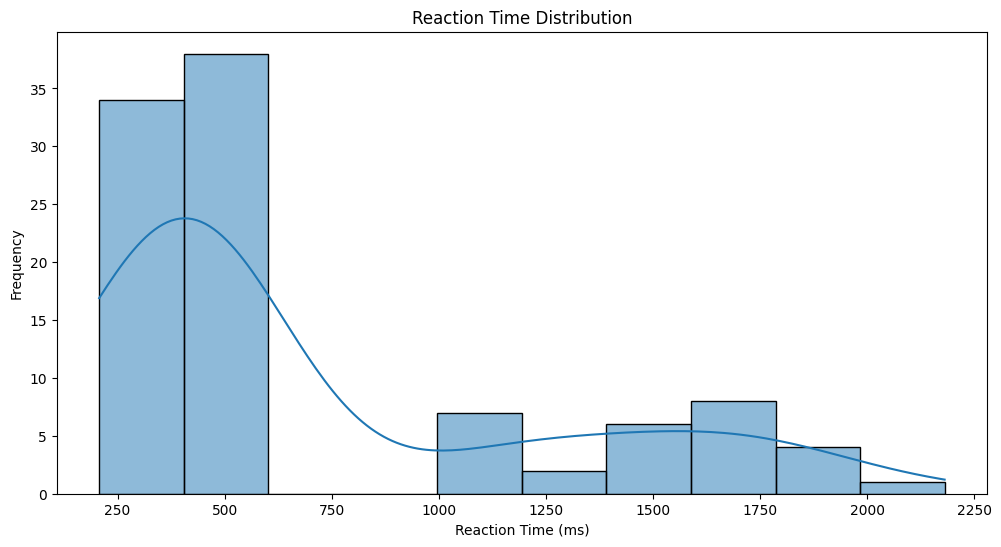

In [12]:
# 7. Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(data["Reaction Time (ms)"], bins=10, kde=True)
plt.title("Reaction Time Distribution")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.show()

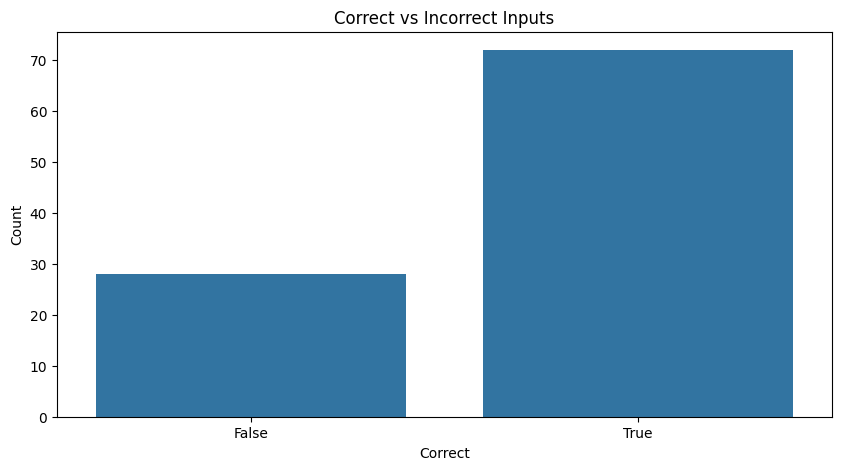

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x=correct_counts.index, y=correct_counts.values)
plt.title("Correct vs Incorrect Inputs")
plt.ylabel("Count")
plt.show()

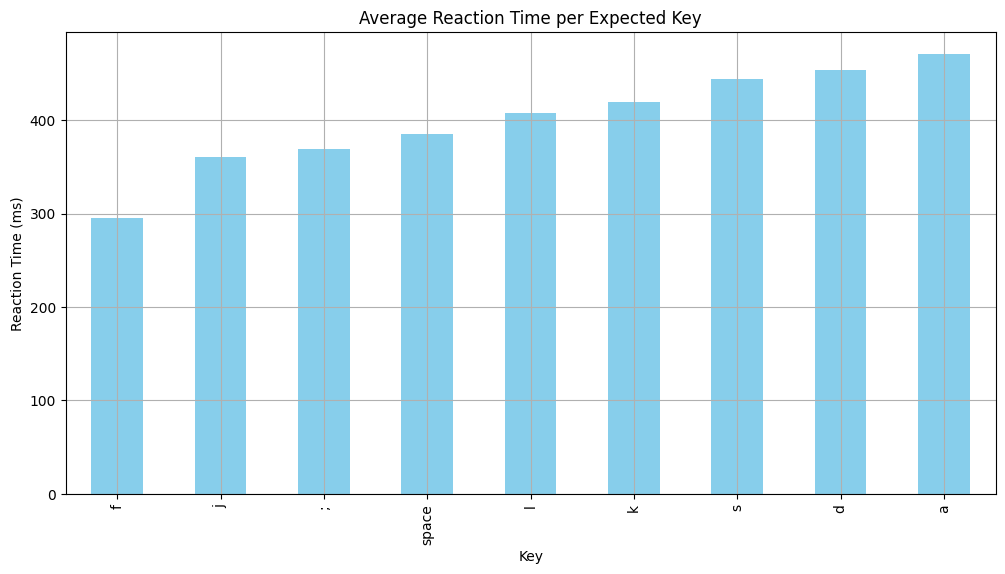

In [14]:
plt.figure(figsize=(12, 6))
reaction_by_key.sort_values().plot(kind='bar', color='skyblue')
plt.title("Average Reaction Time per Expected Key")
plt.ylabel("Reaction Time (ms)")
plt.xlabel("Key")
plt.grid(True)
plt.show()

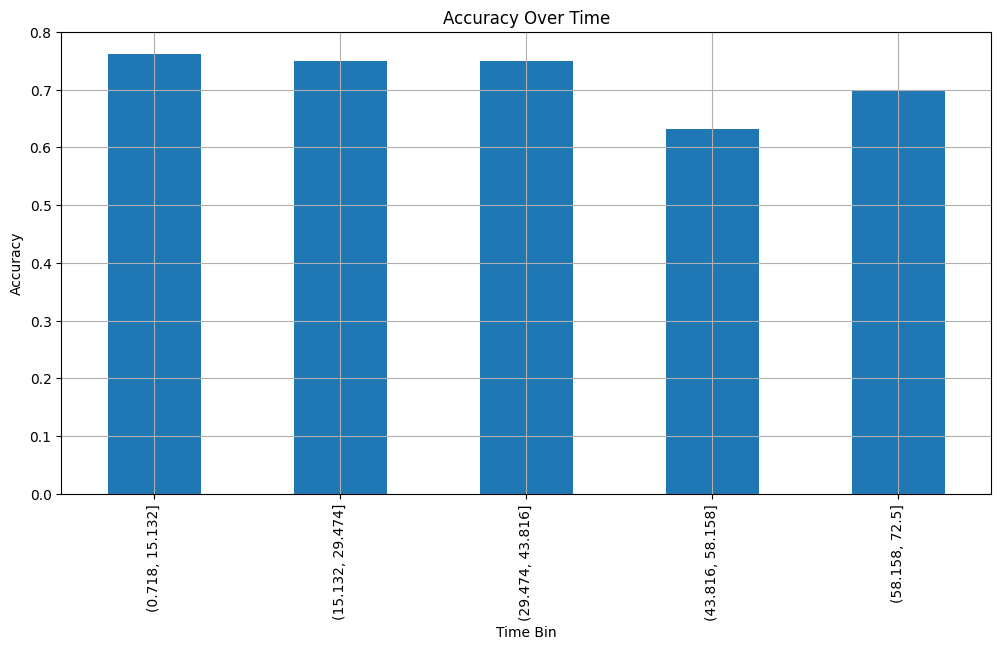

In [15]:
accuracy_time.plot(kind="bar", title="Accuracy Over Time", ylabel="Accuracy", xlabel="Time Bin", figsize=(12, 6))
plt.grid(True)
plt.show()